In [3]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns
import  re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

---
### Load Dataset
---

In [4]:
fnews = pd.read_csv('news _dataset/Fake.csv')
tnews = pd.read_csv('news _dataset/True.csv')

---
### EDA
---

In [5]:
fnews.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
tnews.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
fnews.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


fake news

In [8]:
fnews['subject'].value_counts()

subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64

real news

In [9]:
tnews['subject'].value_counts()

subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64

---
### Concatenate dataset and create target columns
---

In [10]:
tnews['target']=1
fnews['target']=0

fnews = pd.concat([tnews , fnews] , ignore_index=True)
fnews = fnews.sample(frac=1, random_state=42).reset_index(drop=True)


display(fnews.head())
print('-'*40)

print('shape' , fnews.shape)
print('-'*40)

display(fnews.dtypes )
print('-'*40)

display(fnews.isna().sum())

,title,text,subject,date,target
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",0
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",0
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",0
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",1
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",0


----------------------------------------
shape (44898, 5)
----------------------------------------


title      object
text       object
subject    object
date       object
target      int64
dtype: object

----------------------------------------


title      0
text       0
subject    0
date       0
target     0
dtype: int64

---
1. Data shape
---

In [11]:
print(f'The number of columns: = {fnews.shape[1]}\n The number of rows: = {fnews.shape[0]}')

The number of columns: = 5
 The number of rows: = 44898


---
### Check dublicates
---

In [12]:
fnews.duplicated().sum()

209

---
### drop dublicates
---

In [13]:
fnews = fnews.drop_duplicates()

In [14]:
fnews.duplicated().sum()

0

---
### drop blanks columns
---

In [15]:
# Identify the rows with blank values
blanks = fnews.isnull().any(axis=1)

# Drop the rows with blank values
fnews.drop(fnews[blanks].index, inplace=True)

In [16]:
print(f'The number of columns: = {fnews.shape[1]}\n The number of rows: = {fnews.shape[0]}')      

The number of columns: = 5
 The number of rows: = 44689


In [17]:
fnews['target'].value_counts()

target
0    23478
1    21211
Name: count, dtype: int64

C:\Users\seabd\AppData\Local\Temp\ipykernel_19248\1859163794.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fnews, x='target', palette='viridis')


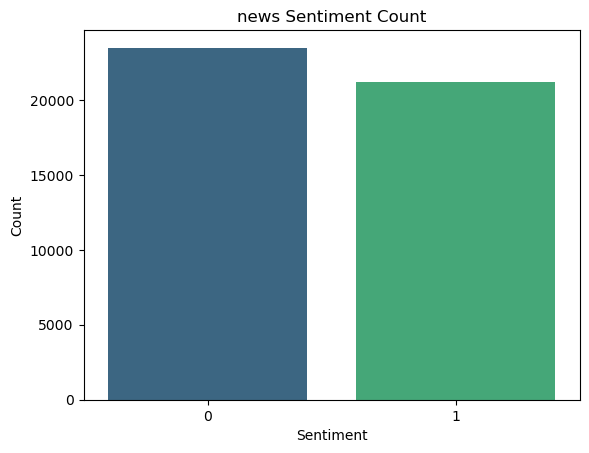

In [18]:
sns.countplot(data=fnews, x='target', palette='viridis')
plt.title('news Sentiment Count')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

<Axes: ylabel='count'>

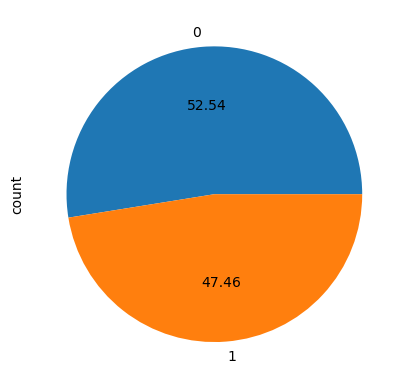

In [19]:
fnews['target'].value_counts().plot.pie(autopct='%.2f')

# **observation**
* 47.46% are real news
* 52.54% are fake news

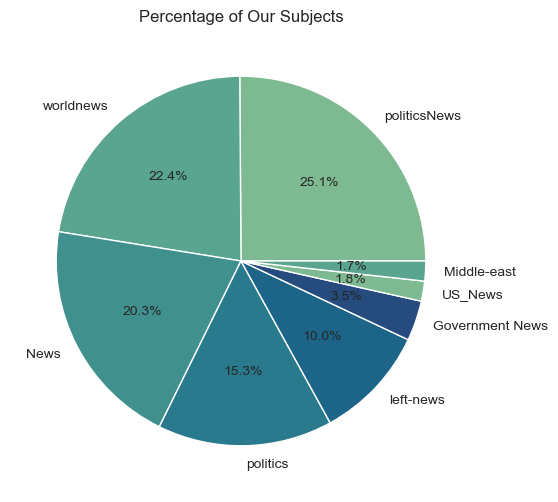

In [20]:
sns.set_palette("crest")  
sns.set_style("whitegrid")  

plt.figure(figsize=(6, 6)) 
fnews['subject'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Percentage of Our Subjects')
plt.ylabel(None) 
plt.show()

# **observation**
# 1. Real news
    * 22.4% are wordnews
   * 25.1.54% are politicsnews
#  2. Fake news
     * 20.3% are news
    * 15.3% are politics
    * 10% left_news
    * 3.5% Goverment news
    * 1.8% US_News
    * 1.7% Middle_east

In [21]:
fnews.head()

,title,text,subject,date,target
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",0
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",0
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",0
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",1
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",0


---
## **Needed only columns one is**
* text
* target
---

In [22]:
fnews = fnews[['text', 'target']]

In [23]:
fnews.head()

,text,target
0,"Donald Trump s White House is in chaos, and th...",0
1,Now that Donald Trump is the presumptive GOP n...,0
2,Mike Pence is a huge homophobe. He supports ex...,0
3,SAN FRANCISCO (Reuters) - California Attorney ...,1
4,Twisted reasoning is all that comes from Pelos...,0


In [24]:
fnews['text'][3]

'SAN FRANCISCO (Reuters) - California Attorney General Xavier Becerra said on Friday he was “prepared to take whatever action it takes” to defend the Obamacare mandate that health insurers provide birth control, now that the Trump administration has moved to circumvent it. The administration’s new contraception exemptions “are another example of the Trump administration trampling on people’s rights, but in this case only women,” Becerra told Reuters.  Becerra and other Democratic attorneys general have filed courtroom challenges to other Trump administration policies involving healthcare, immigration and the environment.  '

In [25]:
fnews['text'][2]

'Mike Pence is a huge homophobe. He supports ex-gay conversion therapy, opposes hate crimes protections for LGBTQ people, is staunchly against marriage equality, and once said that he believes that same-sex couples will lead to  societal collapse.  To that end, the folks who are being forced to live near the now- vice president-elect near his newly rented house in Washington, DC are none too happy with their new neighbor. However, instead of protesting him with rallies in the streets, they ve decided to troll him instead.The residents in the Chevy Chase neighborhood are hanging large rainbow flags on their homes to send a signal to Mike Pence   that his homophobia is not welcome in their neck of the wood. According to local station WJLA: A respectful message showing, in my case, my disagreement with some of his thinking,  said Ilse Heintzen.The  he  Heintzen is referring to is Vice-President Elect Mike Pence. Pence moved into a house on Heintzen s block where he will stay on-and-off un

---
### **Text Preprocessing**
---

## 3. Data Preprocessing
* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming

---
### Lowercase
---

In [26]:
fnews['text']=fnews['text'].str.lower()

In [27]:
fnews.head()

,text,target
0,"donald trump s white house is in chaos, and th...",0
1,now that donald trump is the presumptive gop n...,0
2,mike pence is a huge homophobe. he supports ex...,0
3,san francisco (reuters) - california attorney ...,1
4,twisted reasoning is all that comes from pelos...,0


---
## Remove Punctuation
---

In [28]:
import string
def remove_pun(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [29]:
fnews['text'] = fnews['text'].apply(remove_pun)

In [30]:
fnews.head()

,text,target
0,donald trump s white house is in chaos and the...,0
1,now that donald trump is the presumptive gop n...,0
2,mike pence is a huge homophobe he supports exg...,0
3,san francisco reuters california attorney gen...,1
4,twisted reasoning is all that comes from pelos...,0


---
## remove stopwords
---

In [31]:
def remove_stopwords(text):
    # Download the stopwords corpus if it hasn't been downloaded already
    nltk.download('stopwords', quiet=True)
    
    # Get the list of stopwords
    stop_words = set(stopwords.words('english'))
    
    # Split the text into words
    words = text.split()
    
    # Remove the stopwords
    filtered_words = [word for word in words if word.lower() not in stop_words]
    
    # Join the filtered words back into a single string
    filtered_text = ' '.join(filtered_words)
    
    return filtered_text

In [32]:
fnews['text'] = fnews['text'].apply(remove_stopwords)

In [33]:
fnews.head()

,text,target
0,donald trump white house chaos trying cover ru...,0
1,donald trump presumptive gop nominee time reme...,0
2,mike pence huge homophobe supports exgay conve...,0
3,san francisco reuters california attorney gene...,1
4,twisted reasoning comes pelosi days especially...,0


---
## **Tokenization**
---

In [34]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def data_processing(text):
    # Remove mentions and hashtags
    text = re.sub(r'\@w+|\#', '', text)
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize the text
    text_tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_text = [w for w in text_tokens if w.lower() not in stop_words]
    
    return " ".join(filtered_text)

In [35]:
fnews['text'] = fnews['text'].apply(data_processing)

In [36]:
fnews.head()

,text,target
0,donald trump white house chaos trying cover ru...,0
1,donald trump presumptive gop nominee time reme...,0
2,mike pence huge homophobe supports exgay conve...,0
3,san francisco reuters california attorney gene...,1
4,twisted reasoning comes pelosi days especially...,0


In [37]:
fnews['text'][0]

'donald trump white house chaos trying cover russia problems mounting hour refuse acknowledge problems surrounding fake news hoax however facts bear things differently seems cracks congressional public leadershipchuck grassley riowa heads senate judiciary committee fed demanding donald trump jr former 2016 trump campaign manager paul manafort testify committee regarding infamous shady meeting donald trump shady russian lawyer promised dirt 2016 democratic presidential nominee hillary clinton fact information due well demand sends signals team trump notably fire special counsel robert mueller circumstances despite fact seems seems trump white house laying groundwork speak speakhere tweet regarding grassley warningalso anyone thinks senator grassley rest senate serious needs look warning already given trump jr manafort either follow orders served subpoenas force comply refuse held contempt congress carries serious jail timeeven cruel craven creatures within gop sick donald trump corrupti

---
### Stemmer
---

In [38]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [39]:
fnews['text'] = fnews['text'].apply(stemming)

In [40]:
fnews.head()

,text,target
0,donald trump white house chaos trying cover ru...,0
1,donald trump presumptive gop nominee time reme...,0
2,mike pence huge homophobe supports exgay conve...,0
3,san francisco reuters california attorney gene...,1
4,twisted reasoning comes pelosi days especially...,0


---
## **Word cloud**
---

In [41]:
from wordcloud import WordCloud
def create_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

---
## **For Real news**
---

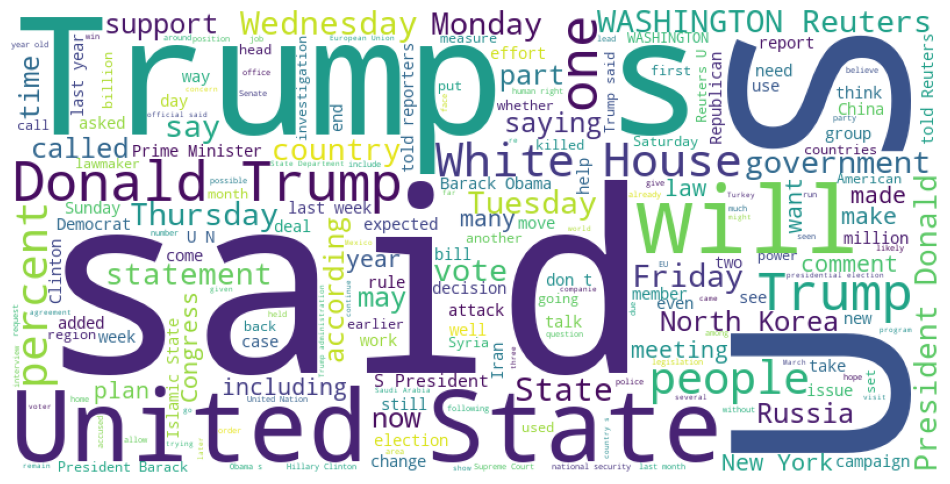

In [55]:
# Generate wordcloud for real news
real_news_text = ' '.join(tnews[tnews['target'] == 1]['text'])
create_wordcloud(real_news_text)

---
## ****For Fake news****
---

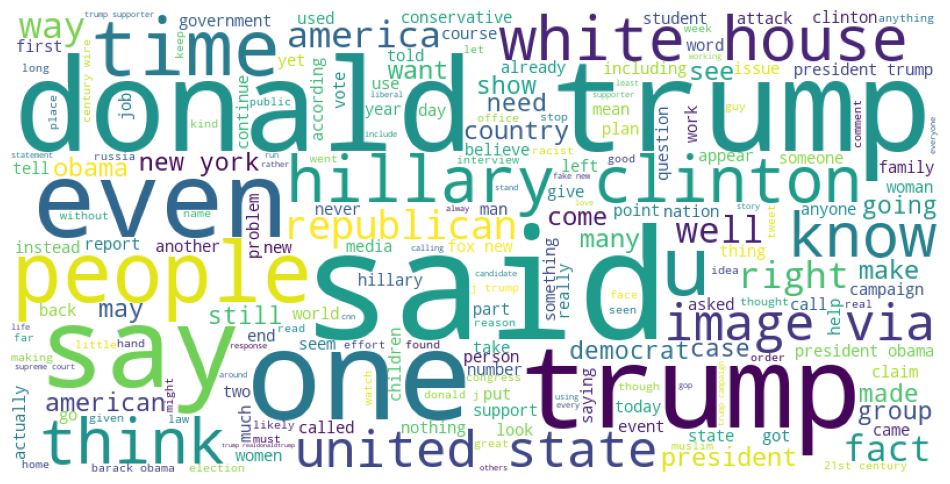

In [43]:
# Generate wordcloud for fake news
fake_news_text = ' '.join(fnews[fnews['target'] == 0]['text'])
create_wordcloud(fake_news_text)

---
## **Model Building**
---

---
## **spliting into x and y**
---

In [44]:
X = fnews['text']
Y = fnews['target']

---
## **TfidfVectorizer**
---

In [45]:
vect = TfidfVectorizer()
X = vect.fit_transform(fnews['text'])

---
## **train_test_split**
---

In [46]:
# 70% training and 30% testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [47]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (31282, 227572)
Size of y_train:  (31282,)
Size of x_test:  (13407, 227572)
Size of y_test:  (13407,)


In [64]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Train a Linear SVC model
svc = LinearSVC()
svc.fit(x_train, y_train)

# Make predictions
svc_pred = svc.predict(x_test)

# Calculate accuracy
svc_acc = accuracy_score(y_test, svc_pred)

# Print accuracy
print("Test accuracy: {:.2f}%".format(svc_acc * 100))


Test accuracy: 99.52%


In [63]:
# توقعات النموذج على مجموعة التدريب
train_pred = svc.predict(x_train)

# حساب الدقة على مجموعة التدريب
train_accuracy = accuracy_score(y_train, train_pred)

# طباعة الدقة على مجموعة التدريب
print(f"Training accuracy: {train_accuracy * 100:.2f}%")


Training accuracy: 99.99%


In [49]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[7038   28]
 [  37 6304]]


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7066
           1       1.00      0.99      0.99      6341

    accuracy                           1.00     13407
   macro avg       1.00      1.00      1.00     13407
weighted avg       1.00      1.00      1.00     13407



In [79]:
# Function to predict the news type
def predict_news_type(news_text):
    news_vectorized = vect.transform([news_text])
    prediction = svc.predict(news_vectorized)
    if prediction[0] == 1:
        return "{output = Real News}"
    else:
        return "{output = Fake News}"

# Get user input
user_news = input("Enter the news text: ")

# Predict the news type
news_type = predict_news_type(user_news)
print(f"The news is classified as: {news_type}")

The news is classified as: {output = Real News}
